In [1]:
import pandas as pd

# Load the dataset
file_path = "/kaggle/input/appplelelel/negative_reviews (1).csv"
df = pd.read_csv(file_path)

# Display the first few rows and column names to understand the structure
df.head(), df.columns


(        Restaurant       Reviewer  \
 0  Beyond Flavours  Kankaria.ritu   
 1  Beyond Flavours    Tejaswi Rao   
 2  Beyond Flavours          Mudit   
 3  Beyond Flavours   Surya Sharma   
 4  Beyond Flavours   Parshwa Shah   
 
                                               Review  Rating  \
 0  We ordered corn cheese balls, manchow soup and...     1.0   
 1  we went for a team lunch, such a worst restaur...     1.0   
 2  I have been at this place for dinner a few day...     2.0   
 3  Hostile staff, okeish food, not so great ambia...     1.0   
 4  Food quality and taste is not good. Super slow...     2.0   
 
                    Metadata             Time  Pictures  Sentiment  
 0                  1 Review  5/22/2019 21:19         0  -0.500000  
 1   1 Review , 24 Followers   5/15/2019 3:26         0  -0.365000  
 2    1 Review , 2 Followers   5/12/2019 8:37         0  -0.036538  
 3  2 Reviews , 10 Followers  5/10/2019 23:24         0  -0.023333  
 4    3 Reviews , 1 Follower   5/

In [2]:
# Define negative review categories
categories = ['food', 'service', 'ambience', 'price', 'hygiene']

# Function to find which categories are mentioned in the review
def find_categories(review):
    review = review.lower()
    return [cat for cat in categories if cat in review]

# Apply function to each review and store the list of categories in a new column
df['Categories'] = df['Review'].apply(find_categories)

# Filter: keep only rows where the number of categories is exactly 1
filtered_df = df[df['Categories'].apply(len) == 1].reset_index(drop=True)

filtered_df.head()


,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures,Sentiment,Categories
0,Beyond Flavours,Surya Sharma,"Hostile staff, okeish food, not so great ambia...",1.0,"2 Reviews , 10 Followers",5/10/2019 23:24,0,-0.023333,[food]
1,Beyond Flavours,Trupti Dhongdi,Had a very bad experience here\nbeyond flavour...,1.0,"12 Reviews , 5 Followers",5/8/2019 14:35,0,-0.102500,[food]
2,Shah Ghouse Hotel & Restaurant,Dinesh Jana,Its a worst thing happened with me.we ordered ...,1.0,"5 Reviews , 5083 Followers",5/19/2019 23:08,0,-0.800000,[food]
3,Shah Ghouse Hotel & Restaurant,G V Satish,"Worst food, no quality this would be the worst...",1.0,"1 Review , 1 Follower",4/21/2019 20:50,1,-0.628571,[food]
4,Shah Ghouse Hotel & Restaurant,Sanjay,This is bloody disgusting. I had to wait for m...,1.0,1 Review,4/7/2019 15:14,0,-0.170000,[service]


In [3]:
# Show the total number of rows in the filtered dataset
filtered_count = len(filtered_df)
filtered_count


533

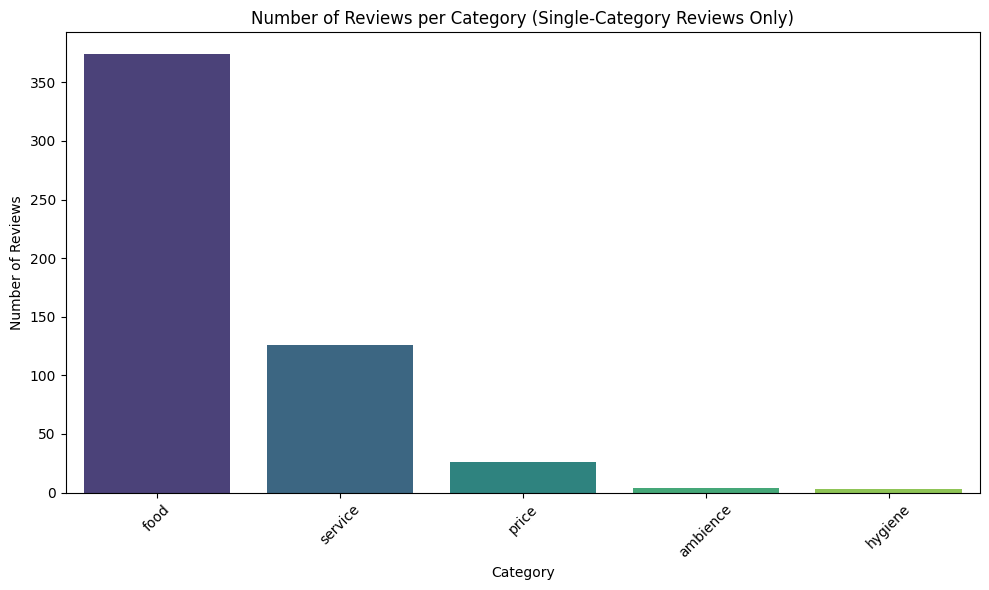

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count of reviews per single category
category_counts = filtered_df['Categories'].explode().value_counts()

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x=category_counts.index, y=category_counts.values, palette="viridis")
plt.title("Number of Reviews per Category (Single-Category Reviews Only)")
plt.xlabel("Category")
plt.ylabel("Number of Reviews")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [5]:
# Export the filtered dataset to a CSV file
filtered_df.to_csv("filtered_negative_reviews.csv", index=False)


In [6]:
filtered_df.columns

Index(['Restaurant', 'Reviewer', 'Review', 'Rating', 'Metadata', 'Time',
       'Pictures', 'Sentiment', 'Categories'],
      dtype='object')

In [29]:
!pip install gradio


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.0/54.0 MB 32.1 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.6/322.6 kB 12.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.5/11.5 MB 90.9 MB/s eta 0:00:00:00:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 3.2 MB/s eta 0:00:00


In [25]:
#Proposed

import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from transformers import AutoTokenizer, AutoModel
import torch
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from sklearn.preprocessing import LabelEncoder
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

# Download necessary NLTK resources if not already installed
try:
    nltk.data.find('tokenizers/punkt')
    nltk.data.find('corpora/stopwords')
    nltk.data.find('corpora/wordnet')
except LookupError:
    nltk.download('punkt')
    nltk.download('stopwords')
    nltk.download('wordnet')

# Load the dataset from CSV file
def load_dataset(file_path):
    try:
        df = pd.read_csv(file_path)
        print(f"Dataset loaded with {len(df)} reviews")
        print(f"Columns: {df.columns.tolist()}")
        return df
    except Exception as e:
        print(f"Error loading dataset: {e}")
        return None

# Domain-specific keyword dictionaries - improved with more specific keywords
food_terms = [
    'food', 'dish', 'meal', 'taste', 'flavor', 'cuisine', 'delicious', 'tasty', 'appetizer',
    'dessert', 'entree', 'menu', 'recipes', 'spicy', 'sweet', 'sour', 'bitter', 'salty',
    'biriyani', 'biryani', 'burger', 'pizza', 'pasta', 'noodle', 'rice', 'bread', 'roti',
    'paratha', 'curry', 'salad', 'soup', 'steak', 'fish', 'chicken', 'mutton', 'beef',
    'pork', 'seafood', 'vegetable', 'fruit', 'eat', 'ate', 'eating', 'ingredient',
    'juice', 'milkshake', 'smoothie', 'breakfast', 'lunch', 'dinner', 'snack', 'appetizer',
    'starter', 'main course', 'dessert', 'ice cream', 'cake', 'pastry', 'cookie', 'chocolate',
    'cheese', 'sauce', 'spice', 'herb', 'creamy', 'crunchy', 'juicy', 'tender', 'overcooked',
    'undercooked', 'burnt', 'raw', 'fresh', 'stale', 'cold', 'hot', 'warm', 'delicious',
    'tasty', 'yummy', 'nasty', 'bland', 'flavorful', 'savory', 'appetizing', 'plate', 'platter',
    'chef', 'cook', 'kitchen', 'cooking', 'serving', 'portion', 'portions', 'bite', 'dishes',
    'cuisine', 'menu', 'meal', 'breakfast', 'lunch', 'dinner', 'order', 'ordered', 'taste',
    'tasted', 'dining', 'buffet', 'specialty', 'recipe', 'signature dish', 'specialty dish',
    'delicacy'
]

service_terms = [
    'service', 'staff', 'waiter', 'waitress', 'server', 'host', 'hostess', 'manager',
    'attendant', 'receptionist', 'cashier', 'bartender', 'attitude',
    'behavior', 'manner', 'polite', 'rude', 'friendly', 'unfriendly', 'helpful', 'unhelpful',
    'attentive', 'inattentive', 'responsive', 'unresponsive', 'quick', 'slow', 'fast',
    'efficient', 'inefficient', 'professional', 'unprofessional', 'courteous', 'discourteous',
    'welcome', 'greet', 'greeting', 'ignored', 'attention', 'serve', 'serving', 'wait',
    'waiting', 'time', 'delay', 'prompt', 'late', 'early', 'reservation', 'order', 'delivery',
    'takeout', 'customer', 'complain', 'complaint', 'request', 'apologize', 'apology', 'tip',
    'tipping', 'service charge', 'refund', 'manager', 'management', 'staff members',
    'customer service', 'called', 'returned', 'reservation', 'booking', 'seating', 'rushed',
    'attentive', 'neglected', 'forgot', 'remembered', 'brought', 'took', 'waited', 'attended',
    'assistance', 'helped', 'seated', 'welcomed', 'greeted', 'responded'
]

ambience_terms = [
    'ambience', 'atmosphere', 'environment', 'decor', 'decoration', 'interior', 'design',
    'lighting', 'music', 'noise', 'noisy', 'quiet', 'peaceful', 'loud', 'crowded', 'spacious',
    'cozy', 'comfortable', 'uncomfortable', 'seating', 'seat', 'table', 'chair', 'booth',
    'view', 'window', 'patio', 'outdoor', 'indoor', 'air conditioning', 'ac', 'heating',
    'temperature', 'hot', 'cold', 'warm', 'cool', 'fan', 'ventilation', 'theme', 'themed',
    'vibe', 'mood', 'feeling', 'romantic', 'family-friendly', 'casual', 'formal', 'elegant',
    'rustic', 'modern', 'traditional', 'classic', 'trendy', 'stylish', 'decoration',
    'furnishing', 'furniture', 'wall', 'ceiling', 'floor', 'color', 'paint', 'artwork',
    'plant', 'flower', 'candle', 'space', 'layout', 'arrangement', 'setting', 'aesthetic',
    'ambiance', 'beautiful', 'pretty', 'ugly', 'look', 'looks', 'looked', 'looking',
    'appearance', 'appeared', 'appears', 'decorated', 'designed', 'furnished', 'fit',
    'setting', 'scene', 'scenery', 'venue', 'location', 'place', 'establishment', 'restaurant',
    'café', 'coffee shop', 'bistro', 'bar', 'pub', 'lounge', 'dining room', 'hall',
    'interior', 'exterior', 'surrounding', 'surrounding'
]

price_terms = [
    'price', 'cost', 'value', 'money', 'expensive', 'cheap', 'affordable', 'overpriced',
    'reasonable', 'unreasonable', 'budget', 'pricey', 'bargain', 'deal', 'worthwhile',
    'worth', 'spend', 'spending', 'bill', 'check', 'payment', 'charge', 'fee', 'tip',
    'discount', 'offer', 'special', 'promotion', 'coupon', 'voucher', 'happy hour',
    'complimentary', 'free', 'pricing', 'rate', 'economical', 'costly', 'premium',
    'high-end', 'low-end', 'inexpensive', 'extravagant', 'luxury', 'budget-friendly',
    'value for money', 'bang for buck', 'wallet', 'savings', 'investment', 'costly',
    'taka', 'rupee', 'dollar', 'currency', 'pay', 'paid', 'penny', 'cent',
    'dollars', 'euro', 'euros', 'pound', 'pounds', 'cash', 'card', 'credit', 'debit',
    'transaction', 'purchase', 'bought', 'buy', 'selling', 'sold', 'cost', 'costs',
    'costing', 'costed', 'expensive', 'cheap', 'costly', 'affordable', 'budget', 'save',
    'saved', 'saving', 'savings', 'economical', 'economy', 'economize', 'economized',
    'economizing', 'bargain', 'deal', 'sale', 'discount', 'discounted', 'discounting',
    'overpriced', 'underpriced', 'rip-off', 'ripoff', 'ripped off', 'worth', 'worthy',
    'worthwhile', 'value', 'valuable', 'invaluable', 'priceless'
]

hygiene_terms = [
    'hygiene', 'clean', 'cleanliness', 'dirty', 'filthy', 'spotless', 'tidy', 'untidy',
    'mess', 'messy', 'neat', 'sanitary', 'unsanitary', 'hygienic', 'unhygienic', 'health',
    'healthy', 'unhealthy', 'sanitation', 'bacteria', 'germ', 'dust', 'stain', 'spill',
    'garbage', 'trash', 'waste', 'dispose', 'disposal', 'wash', 'washed', 'unwashed',
    'bathroom', 'toilet', 'restroom', 'lavatory', 'sink', 'soap', 'hand sanitizer',
    'disinfect', 'disinfectant', 'mop', 'sweep', 'vacuum', 'wipe', 'polish', 'shine',
    'odor', 'smell', 'scent', 'stink', 'fresh', 'stale', 'moldy', 'rotten', 'pest',
    'insect', 'bug', 'fly', 'cockroach', 'rat', 'mouse', 'contamination', 'contaminated',
    'pure', 'impure', 'maintenance', 'maintain', 'standard', 'regulation', 'inspect',
    'inspection', 'certificate', 'certified', 'quality', 'condition', 'dirty', 'filthy', 'unclean', 'disgusting', 'gross', 'unsanitary',
    'sticky', 'grimy', 'dusty', 'greasy', 'stained', 'smelly', 'smells',
    'stink', 'stinks', 'stinky', 'odor', 'garbage', 'trash', 'roach',
    'roaches', 'rat', 'rats', 'mouse', 'mice', 'insect', 'insects',
    'unhygienic', 'contaminated', 'mold', 'mildew', 'spoiled',
    'unkempt', 'messy', 'dirty floor', 'dirty table', 'dirty bathroom',
    'bathroom cleanliness', 'hand washing', 'not clean', 'wasn\'t clean',
    'hair', 'hairs', 'found', 'washroom', 'floor', 'table', 'napkin', 'utensil',
    'plate', 'glass', 'fork', 'spoon', 'knife', 'chopstick', 'washroom', 'toilet',
    'flies', 'fly', 'roach', 'roaches', 'bug', 'bugs', 'wipe', 'wiped', 'wiping',
    'sanitize', 'sanitized', 'sanitizing', 'disinfect', 'disinfected', 'disinfecting'
]

# Create domain keyword mapping for feature recognition
domain_keywords = {
    'food': set(food_terms),
    'service': set(service_terms),
    'ambience': set(ambience_terms),
    'price': set(price_terms),
    'hygiene': set(hygiene_terms)
}

# Improved text preprocessing function with domain detection
def preprocess_text(text):
    # Convert to lowercase
    text = str(text).lower()
    
    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text)
    
    # Remove special characters but keep negations and important punctuation
    text = re.sub(r'[^\w\s\'!?]', ' ', text)
    
    # Replace common contractions
    text = re.sub(r"n\'t", " not", text)
    text = re.sub(r"\'s", " is", text)
    text = re.sub(r"\'re", " are", text)
    text = re.sub(r"\'m", " am", text)
    text = re.sub(r"\'ve", " have", text)
    text = re.sub(r"\'ll", " will", text)
    text = re.sub(r"\'d", " would", text)
    
    # Remove numbers
    text = re.sub(r'\d+', '', text)
    
    # Remove extra whitespace
    text = re.sub(r'\s+', ' ', text).strip()
    
    # Tokenization
    tokens = word_tokenize(text)
    
    # Remove stopwords but keep negation words
    stop_words = set(stopwords.words('english')) - {'no', 'not', 'nor', 'none', 'never', 'hardly', 'rarely'}
    tokens = [token for token in tokens if token not in stop_words]
    
    # Handle negations by marking the next few words with NEG_ prefix
    negation = False
    negation_scope = 3  # Number of words affected by negation
    count = 0
    
    for i in range(len(tokens)):
        if tokens[i] in ['no', 'not', 'never', 'none', 'nor', 'hardly', 'rarely']:
            negation = True
            count = 0
            continue
        
        if negation and count < negation_scope:
            if tokens[i] not in ['.', ',', '!', '?', ';', ':']:
                tokens[i] = 'NEG_' + tokens[i]
                count += 1
        
        if tokens[i] in ['.', ',', '!', '?', ';', ':']:
            negation = False
    
    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    
    # Add domain-specific tags for key categories
    domain_mentions = detect_domain_mentions(tokens, text.lower())
    enhanced_tokens = tokens.copy()
    
    # Add category indicators based on domain detection (more prominent for minority classes)
    for domain, score in domain_mentions.items():
        if score > 0:
            # Add more emphasis to minority classes for better detection
            if domain in ['hygiene', 'ambience', 'price'] and score > 0:
                # Add multiple indicators for minority classes to increase their signal
                for _ in range(min(3, int(score * 2))):  # Cap at 3 repetitions
                    enhanced_tokens.append(f"DOMAIN_{domain}")
            else:
                # Add fewer indicators for majority classes
                enhanced_tokens.append(f"DOMAIN_{domain}")
    
    return ' '.join(enhanced_tokens)

# Detect domain mentions with improved scoring
def detect_domain_mentions(tokens, text):
    domain_scores = {domain: 0 for domain in domain_keywords.keys()}
    
    # Check for domain-specific keywords in tokens
    for token in tokens:
        base_token = token[4:] if token.startswith('NEG_') else token
        for domain, keywords in domain_keywords.items():
            if base_token in keywords:
                # Increase score for all matching words
                domain_scores[domain] += 1
                # Give extra weight to negated terms for better sentiment detection
                if token.startswith('NEG_'):
                    domain_scores[domain] += 0.5
    
    # Check for specific phrases that are strong indicators
    # Hygiene indicators (very specific)
    if any(phrase in text for phrase in ['dirty bathroom', 'hair in', 'found hair', 'not clean', 
                                        'dirty table', 'cockroach', 'flies', 'dirty floor']):
        domain_scores['hygiene'] += 3  # Strong boost for hygiene signals
    
    # Ambience indicators (very specific)
    if any(phrase in text for phrase in ['the atmosphere', 'the decor', 'the ambience', 
                                       'the ambiance', 'the interior', 'the music',
                                       'the lighting', 'the environment', 'the mood']):
        domain_scores['ambience'] += 3  # Strong boost for ambience signals
    
    # Price indicators (very specific)
    if any(phrase in text for phrase in ['too expensive', 'overpriced', 'not worth', 
                                       'the price', 'the bill', 'the cost', 
                                       'good value', 'expensive for']):
        domain_scores['price'] += 3  # Strong boost for price signals
        
    # Return domain scores
    return domain_scores

# More robust data augmentation with class-specific strategies
def augment_text(text, category, p_swap=0.1, p_drop=0.1):
    tokens = text.split()
    if len(tokens) < 3:
        return text
        
    result = tokens.copy()
    
    # Don't swap or drop negation markers or domain indicators
    protected_words = ['no', 'not', 'never', 'none', 'nor', 'hardly', 'rarely', 'NEG_', 'DOMAIN_']
    
    # Randomly swap adjacent words (but protect important words)
    for i in range(len(result)-1):
        if (np.random.random() < p_swap and 
            not any(neg in result[i] for neg in protected_words) and 
            not any(neg in result[i+1] for neg in protected_words)):
            result[i], result[i+1] = result[i+1], result[i]
    
    # Randomly drop words (excluding important ones)
    drop_indices = []
    for i in range(1, len(result)-1):
        if (np.random.random() < p_drop and 
            len(result) > 3 and 
            not any(neg in result[i] for neg in protected_words)):
            drop_indices.append(i)
    
    # Drop words in reverse order to avoid index issues
    for i in sorted(drop_indices, reverse=True):
        if len(result) > 3:  # Ensure we don't drop too many words
            result.pop(i)
    
    # For minority classes, add more domain-specific terms to make signal stronger
    if category in ['hygiene', 'ambience', 'price']:
        augmentation_keywords = {
            'hygiene': ['cleanliness', 'clean', 'sanitary', 'hygiene', 'tidy'],
            'ambience': ['atmosphere', 'ambience', 'decor', 'interior', 'environment'],
            'price': ['price', 'cost', 'value', 'expensive', 'affordable']
        }
        
        # Add 1-2 relevant terms to strengthen the signal
        num_terms = np.random.randint(1, 3)
        for _ in range(num_terms):
            term = np.random.choice(augmentation_keywords[category])
            insert_pos = np.random.randint(0, len(result))
            result.insert(insert_pos, term)
            
        # Add domain indicator
        result.append(f"DOMAIN_{category}")
    
    return ' '.join(result)

# Advanced synthetic data generation for minority classes
def generate_synthetic_samples(minority_samples, category, count):
    synthetic_samples = []
    
    # Templates for different categories
    templates = {
        'hygiene': [
            "The {place} was {cleanliness}. {additional}",
            "I found {problem} in the {location}. {reaction}",
            "The {location} {state} {cleanliness}. {additional}",
            "{problem} everywhere in the {location}. {reaction}",
            "They need to improve their {aspect}. {additional}"
        ],
        'ambience': [
            "The {attribute} was {quality}. {additional}",
            "I {liked} the {attribute} of this place. {additional}",
            "The restaurant had a {quality} {attribute}. {additional}",
            "The {location} {state} {quality} for {occasion}. {additional}",
            "What a {quality} {attribute} for a {occasion}. {additional}"
        ],
        'price': [
            "The prices were {cost_level}. {value_statement}",
            "{cost_statement} for what you get. {additional}",
            "I paid {amount} for {item} which was {worth}. {additional}",
            "The {item} {cost_statement} {cost_level}. {additional}",
            "Not {worth} the {cost}. {additional}"
        ]
    }
    
    fillers = {
        'hygiene': {
            'place': ['bathroom', 'restroom', 'floor', 'table', 'kitchen', 'restaurant'],
            'cleanliness': ['dirty', 'filthy', 'not clean', 'unhygienic', 'disgusting', 'spotless', 'clean', 'tidy'],
            'problem': ['hair', 'bugs', 'flies', 'dirt', 'stains', 'cockroaches', 'dust', 'food residue'],
            'location': ['food', 'plate', 'table', 'floor', 'bathroom', 'glass', 'utensils', 'napkin'],
            'state': ['was', 'looked', 'seemed', 'appeared', 'felt'],
            'reaction': ['Disgusting!', 'Gross!', 'Unacceptable!', 'Will not return!', 'Health hazard!', 'Very disappointing.'],
            'aspect': ['cleanliness', 'hygiene standards', 'cleaning routine', 'sanitation'],
            'additional': ['Not coming back.', 'Avoid this place.', 'Very concerning.', 'Definitely a health concern.',
                          'I was shocked.', 'Staff seemed unconcerned.', 'Manager apologized but damage was done.']
        },
        'ambience': {
            'attribute': ['ambience', 'atmosphere', 'décor', 'lighting', 'music', 'interior', 'setting', 'environment', 'vibe', 'aesthetic'],
            'quality': ['cozy', 'romantic', 'relaxing', 'elegant', 'modern', 'rustic', 'noisy', 'loud', 'cramped', 'spacious', 'comfortable'],
            'liked': ['loved', 'enjoyed', 'appreciated', 'was impressed by', 'was disappointed by', 'disliked'],
            'location': ['place', 'restaurant', 'dining area', 'outdoor seating', 'patio', 'bar area', 'main room'],
            'state': ['was', 'felt', 'seemed', 'looked', 'appeared'],
            'occasion': ['date night', 'family dinner', 'business meeting', 'casual meal', 'special occasion', 'romantic evening'],
            'additional': ['It made the experience special.', 'Added to our enjoyment.', 'Created a perfect mood.',
                          'Could use some improvement.', 'Was too distracting.', 'Not what I expected.']
        },
        'price': {
            'cost_level': ['too high', 'reasonable', 'outrageous', 'fair', 'excessive', 'affordable', 'budget-friendly'],
            'value_statement': ['Not worth it.', 'Great value for money.', 'You get what you pay for.', 'Overpriced for what you get.', 'Excellent quality for the price.'],
            'cost_statement': ['Too expensive', 'Very affordable', 'Reasonably priced', 'A complete ripoff', 'Good deal'],
            'amount': ['$20', '$50', '$100', '$30', '$25', 'too much'],
            'item': ['a small dish', 'the appetizers', 'the main course', 'our entire meal', 'the desserts', 'a simple drink'],
            'worth': ['not worth it', 'a good value', 'highway robbery', 'fair', 'reasonable'],
            'additional': ['I expected better quality.', 'The portion size was tiny.', 'Others charge less for more.',
                          'Great deal overall.', 'Price matched the quality.', 'Would pay again.'],
            'cost': ['price', 'cost', 'money', 'expense']
        }
    }
    
    # Generate synthetic samples
    for _ in range(count):
        template = np.random.choice(templates[category])
        filled_template = template
        
        # Replace placeholders with random choices
        for placeholder, options in fillers[category].items():
            if '{' + placeholder + '}' in filled_template:
                filled_template = filled_template.replace('{' + placeholder + '}', np.random.choice(options))
        
        # Process the synthetic text
        processed_text = preprocess_text(filled_template)
        synthetic_samples.append(processed_text)
    
    return synthetic_samples

# Improved balanced dataset creation with synthetic data
def balance_dataset(X, y, label_encoder, minority_multiplier=3.0, use_synthetic=True):
    # Convert numerical labels to category names for easier handling
    y_categories = label_encoder.inverse_transform(y)
    
    # Count class distribution
    class_counts = Counter(y_categories)
    print(f"Original class distribution: {class_counts}")
    
    X_balanced = []
    y_balanced = []
    
    # Find the majority class count
    majority_count = class_counts.most_common(1)[0][1]
    
    # Set target counts for each class
    target_counts = {}
    for category in class_counts:
        if class_counts[category] < 20:  # For very small minority classes
            target_counts[category] = min(50, int(majority_count * 0.4))  # Higher sampling for tiny classes
        elif class_counts[category] < 50:  # For small minority classes
            target_counts[category] = min(100, int(majority_count * 0.6))  # Moderate sampling for small classes
        else:
            target_counts[category] = class_counts[category]  # Keep original count for larger classes
    
    print(f"Target counts per class: {target_counts}")
    
    # Process each class
    for category in class_counts:
        # Get samples for this class
        indices = np.where(y_categories == category)[0]
        current_samples = [X[idx] for idx in indices]
        
        # Add all original samples
        for sample in current_samples:
            X_balanced.append(sample)
            y_balanced.append(category)
        
        # Add additional samples if needed
        if class_counts[category] < target_counts[category]:
            needed = target_counts[category] - class_counts[category]
            
            if use_synthetic and category in ['hygiene', 'ambience', 'price']:
                # For very small minority classes, generate synthetic data
                synthetic_ratio = 0.7  # 70% synthetic, 30% augmented
                synthetic_count = int(needed * synthetic_ratio)
                augment_count = needed - synthetic_count
                
                # Generate synthetic samples
                synthetic_samples = generate_synthetic_samples(current_samples, category, synthetic_count)
                for sample in synthetic_samples:
                    X_balanced.append(sample)
                    y_balanced.append(category)
                
                # Add augmented samples for the remainder
                for _ in range(augment_count):
                    idx = np.random.randint(0, len(current_samples))
                    augmented = augment_text(current_samples[idx], category, p_swap=0.15, p_drop=0.1)
                    X_balanced.append(augmented)
                    y_balanced.append(category)
            else:
                # For larger minority classes, use augmentation
                for _ in range(needed):
                    idx = np.random.randint(0, len(current_samples))
                    augmented = augment_text(current_samples[idx], category, p_swap=0.1, p_drop=0.05)
                    X_balanced.append(augmented)
                    y_balanced.append(category)
    
    # Convert back to numerical labels
    y_balanced_encoded = label_encoder.transform(y_balanced)
    
    # Final class distribution
    final_class_counts = Counter(y_balanced)
    print(f"After balancing: {final_class_counts}")
    
    return np.array(X_balanced), np.array(y_balanced_encoded)

# Custom dataset class for transformer models
class ReviewDataset(Dataset):
    def __init__(self, reviews, labels, tokenizer, max_len=192):  # Increased max_len for better context
        self.reviews = reviews
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_len = max_len
        
    def __len__(self):
        return len(self.reviews)
    
    def __getitem__(self, idx):
        review = str(self.reviews[idx])
        label = self.labels[idx]
        
        encoding = self.tokenizer(
            review,
            add_special_tokens=True,
            max_length=self.max_len,
            padding='max_length',
            truncation=True,
            return_attention_mask=True,
            return_tensors='pt'
        )
        
        return {
            'review_text': review,
            'input_ids': encoding['input_ids'].flatten(),
            'attention_mask': encoding['attention_mask'].flatten(),
            'labels': torch.tensor(label, dtype=torch.long)
        }

# Improved model architecture with focal loss for better minority class handling
class FocalLoss(nn.Module):
    def __init__(self, alpha=0.25, gamma=2.0, reduction='mean'):
        super(FocalLoss, self).__init__()
        self.alpha = alpha
        self.gamma = gamma
        self.reduction = reduction
        
    def forward(self, inputs, targets):
        ce_loss = F.cross_entropy(inputs, targets, reduction='none')
        pt = torch.exp(-ce_loss)
        focal_loss = self.alpha * (1 - pt) ** self.gamma * ce_loss
        
        if self.reduction == 'mean':
            return focal_loss.mean()
        elif self.reduction == 'sum':
            return focal_loss.sum()
        else:
            return focal_loss

# Enhanced transformer classifier with improved attention and class weights
class TransformerClassifier(nn.Module):
    def __init__(self, transformer_model, num_classes, class_weights=None, dropout=0.3):
        super(TransformerClassifier, self).__init__()
        self.transformer = transformer_model
        self.dropout = nn.Dropout(dropout)
        
        # Get the hidden size from the transformer config
        hidden_size = self.transformer.config.hidden_size
        
        # Additional attention layer to focus on important parts of the text
        self.attention = nn.Sequential(
            nn.Linear(hidden_size, 128),
            nn.Tanh(),
            nn.Linear(128, 1),
            nn.Softmax(dim=1)
        )
        
        # Classification layers with regularization
        self.classifier = nn.Sequential(
            nn.Linear(hidden_size, 256),
            nn.LayerNorm(256),
            nn.ReLU(),
            nn.Dropout(dropout),
            nn.Linear(256, num_classes)
        )
        
        # Register class weights for weighted loss
        if class_weights is not None:
            self.register_buffer('class_weights', class_weights)
        else:
            self.class_weights = None
    
    def forward(self, input_ids, attention_mask):
        # Get transformer outputs
        outputs = self.transformer(input_ids=input_ids, attention_mask=attention_mask)
        
        # Use attention to focus on important tokens
        sequence_output = outputs.last_hidden_state
        attention_weights = self.attention(sequence_output).transpose(-1, -2)
        context_vector = torch.matmul(attention_weights, sequence_output).squeeze(1)
        
        # Apply dropout for regularzation
        context_vector = self.dropout(context_vector)
        
        # Final classification
        logits = self.classifier(context_vector)
        return logits

# Training function with early stopping and gradient clipping
def train_model(model, train_loader, val_loader, epochs=10, learning_rate=2e-5, device='cpu', class_weights=None):
    optimizer = optim.AdamW(model.parameters(), lr=learning_rate, weight_decay=0.01)
    scheduler = optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=epochs)
    
    # Use focal loss for better handling of class imbalance
    criterion = FocalLoss(alpha=0.25, gamma=2.0)
    
    best_val_acc = 0
    best_model = None
    patience = 3
    counter = 0
    
    for epoch in range(epochs):
        # Training phase
        model.train()
        train_loss = 0
        
        for batch in train_loader:
            optimizer.zero_grad()
            
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['labels'].to(device)
            
            outputs = model(input_ids=input_ids, attention_mask=attention_mask)
            loss = criterion(outputs, labels)
            
            loss.backward()
            
            # Gradient clipping to prevent exploding gradients
            torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
            
            optimizer.step()
            train_loss += loss.item()
        
        avg_train_loss = train_loss / len(train_loader)
        
        # Validation phase
        model.eval()
        val_loss = 0
        correct = 0
        total = 0
        
        with torch.no_grad():
            for batch in val_loader:
                input_ids = batch['input_ids'].to(device)
                attention_mask = batch['attention_mask'].to(device)
                labels = batch['labels'].to(device)
                
                outputs = model(input_ids=input_ids, attention_mask=attention_mask)
                loss = criterion(outputs, labels)
                
                val_loss += loss.item()
                
                _, predicted = torch.max(outputs, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()
        
        avg_val_loss = val_loss / len(val_loader)
        val_acc = correct / total
        
        print(f'Epoch {epoch+1}: Train Loss: {avg_train_loss:.4f}, Val Loss: {avg_val_loss:.4f}, Val Acc: {val_acc:.4f}')
        
        # Learning rate scheduling
        scheduler.step()
        
        # Early stopping
        if val_acc > best_val_acc:
            best_val_acc = val_acc
            best_model = model.state_dict().copy()
            counter = 0
        else:
            counter += 1
            if counter >= patience:
                print(f'Early stopping after {epoch+1} epochs')
                break
    
    # Load best model
    model.load_state_dict(best_model)
    return model

# Prediction function
def predict(model, test_loader, device):
    model.eval()
    predictions = []
    true_labels = []
    
    with torch.no_grad():
        for batch in test_loader:
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['labels'].to(device)
            
            outputs = model(input_ids=input_ids, attention_mask=attention_mask)
            _, preds = torch.max(outputs, 1)
            
            predictions.extend(preds.cpu().tolist())
            true_labels.extend(labels.cpu().tolist())
    
    return predictions, true_labels

# Main execution function
def main():
    # 1. Load dataset
    file_path = '/kaggle/working/filtered_negative_reviews.csv'  # Update with your file path
    df = load_dataset(file_path)
    
    if df is None:
        print("Failed to load dataset. Exiting...")
        return
    
    # Ensure required columns exist
    required_columns = ['Review', 'Categories']
    if not all(col in df.columns for col in required_columns):
        print(f"Dataset is missing required columns. Required: {required_columns}, Found: {df.columns}")
        return
    
    # 2. Preprocess the data
    print("Preprocessing review texts...")
    df['processed_text'] = df['Review'].apply(preprocess_text)
    
    # 3. Encode labels
    label_encoder = LabelEncoder()
    encoded_labels = label_encoder.fit_transform(df['Categories'])
    
    # Print class distribution
    print("Class distribution:")
    for i, category in enumerate(label_encoder.classes_):
        count = (encoded_labels == i).sum()
        print(f"{category}: {count} samples")
    
    # 4. Calculate class weights for imbalanced data
    class_counts = np.bincount(encoded_labels)
    n_samples = len(encoded_labels)
    class_weights = torch.FloatTensor(n_samples / (len(class_counts) * class_counts))
    
    # 5. Create balanced dataset
    print("Balancing dataset...")
    X_balanced, y_balanced = balance_dataset(
        df['processed_text'].values,
        encoded_labels,
        label_encoder,
        minority_multiplier=2.0,
        use_synthetic=True
    )
    
    # 6. Split into train, validation, test sets
    X_train_val, X_test, y_train_val, y_test = train_test_split(
        X_balanced, 
        y_balanced, 
        test_size=0.15, 
        random_state=42, 
        stratify=y_balanced
    )
    
    X_train, X_val, y_train, y_val = train_test_split(
        X_train_val, 
        y_train_val, 
        test_size=0.15, 
        random_state=42, 
        stratify=y_train_val
    )
    
    print(f"Train set: {len(X_train)} samples")
    print(f"Validation set: {len(X_val)} samples")
    print(f"Test set: {len(X_test)} samples")
    
    # 7. Initialize tokenizer and transformer model
    model_name = "distilbert-base-uncased"  # Using a smaller model for efficiency
    tokenizer = AutoTokenizer.from_pretrained(model_name)
    base_model = AutoModel.from_pretrained(model_name)
    
    # 8. Create datasets and dataloaders
    train_dataset = ReviewDataset(X_train, y_train, tokenizer)
    val_dataset = ReviewDataset(X_val, y_val, tokenizer)
    test_dataset = ReviewDataset(X_test, y_test, tokenizer)
    
    train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=32)
    test_loader = DataLoader(test_dataset, batch_size=32)
    
    # 9. Initialize the model
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    print(f"Using device: {device}")
    
    num_classes = len(label_encoder.classes_)
    model = TransformerClassifier(base_model, num_classes, class_weights=class_weights)
    model.to(device)
    
    # 10. Train the model
    print("Starting model training...")
    trained_model = train_model(
        model,
        train_loader,
        val_loader,
        epochs=5,  # Reduced epochs to prevent overfitting
        learning_rate=3e-5,
        device=device,
        class_weights=class_weights
    )
    
    # 11. Evaluate on test set
    print("Evaluating model on test set...")
    predictions, true_labels = predict(trained_model, test_loader, device)
    
    # 12. Print classification report
    class_names = label_encoder.classes_
    print("\nClassification Report:")
    print(classification_report(true_labels, predictions, target_names=class_names))
    
    # 13. Print confusion matrix
    print("\nConfusion Matrix:")
    conf_matrix = confusion_matrix(true_labels, predictions)
    print(conf_matrix)
    
    # 14. Calculate accuracy
    accuracy = accuracy_score(true_labels, predictions)
    print(f"\nAccuracy: {accuracy:.4f}")
    
    # 15. Save the model
    torch.save({
        'model_state_dict': trained_model.state_dict(),
        'label_encoder': label_encoder,
        'class_names': class_names
    }, 'review_classifier_model.pt')
    
    print("Model saved successfully.")
        
        # Example predictions
    example_texts = [
        "The food was delicious but the service was terrible.",
        "Very expensive for what you get, not worth the money.",
        "Beautiful atmosphere and decor, perfect for a date night.",
        "The washroom was dirty and I found hair in my food. Disgusting!",
        "Great value for money, large portions at reasonable prices."
    ]
        
    print("\nExample Predictions:")
    for text in example_texts:
        category, confidence, top_cats = predict_category(
            model, tokenizer, label_encoder, text, device
        )
        print(f"\nText: {text}")
        print(f"Predicted Category: {category} (confidence: {confidence:.4f})")
        print("Top Categories:")
        for cat, prob in top_cats:
            print(f"  {cat}: {prob:.4f}")

if __name__ == "__main__":
    main()

[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Dataset loaded with 533 reviews
Columns: ['Restaurant', 'Reviewer', 'Review', 'Rating', 'Metadata', 'Time', 'Pictures', 'Sentiment', 'Categories']
Preprocessing review texts...
Class distribution:
['ambience']: 4 samples
['food']: 374 samples
['hygiene']: 3 samples
['price']: 26 samples
['service']: 126 samples
Balancing dataset...
Original class distribution: Counter({"['food']": 374, "['service']": 126, "['price']": 26, "['ambience']": 4, "['hygiene']": 3})
Target counts per class: {"['food']": 374, "['service']": 126, "['price']": 100, "['hygiene']": 50, "['ambience']": 50}
After balancing: Counter({"['food']": 374, "['service']": 126, "['price']": 100, "['hygiene']": 50, "['ambience']": 50})
Train set: 505 samples
Validation set: 90 samples
Test set: 105 samples
Using device: cuda
Starting model training...
Epoch 1: Train Loss: 0.1857, Val Loss: 0.1104, Val Acc: 0.6556
Epoch 2: Train Loss: 0.0554, Val Loss: 0.0043, Val Acc: 0.9889
Epoch 3: Train Loss: 0.0075, Val Loss: 0.0009, Val 

In [27]:
example_texts = [
    "The food was delicious but the service was terrible.",
    "Very expensive for what you get, not worth the money.",
    "Beautiful atmosphere and decor, perfect for a date night.",
    "The washroom was dirty and I found hair in my food. Disgusting!",
    "Great value for money, large portions at reasonable prices."
]

# Function to process user input
def process_user_review():
    while True:
        user_review = input("\nEnter your review: ")
        if user_review.strip():
            category, confidence, top_cats = predict_category(
                model, tokenizer, label_encoder, user_review, device
            )
            print(f"\nYour Review: {user_review}")
            print(f"Predicted Category: {category} (confidence: {confidence:.4f})")
            print("Top Categories:")
            for cat, prob in top_cats:
                print(f"  {cat}: {prob:.4f}")
        else:
            print("Review cannot be empty. Please try again.")
        

# Call the function to start the program
process_user_review()


Enter your review:  overpriced



Your Review: overpriced
Predicted Category: ['price'] (confidence: 0.9879)
Top Categories:
  ['price']: 0.9879
  ['ambience']: 0.0046
  ['hygiene']: 0.0034



Enter your review:  The biriyani tasted bad



Your Review: The biriyani tasted bad
Predicted Category: ['food'] (confidence: 0.9925)
Top Categories:
  ['food']: 0.9925
  ['ambience']: 0.0025
  ['hygiene']: 0.0022



Enter your review:  Dirty place



Your Review: Dirty place
Predicted Category: ['ambience'] (confidence: 0.9934)
Top Categories:
  ['ambience']: 0.9934
  ['price']: 0.0029
  ['food']: 0.0016



Enter your review:  Took a lot time to serve order



Your Review: Took a lot time to serve order
Predicted Category: ['food'] (confidence: 0.6146)
Top Categories:
  ['food']: 0.6146
  ['service']: 0.3736
  ['hygiene']: 0.0059



Enter your review:  had to wait long for the waiter



Your Review: had to wait long for the waiter
Predicted Category: ['service'] (confidence: 0.9911)
Top Categories:
  ['service']: 0.9911
  ['food']: 0.0042
  ['price']: 0.0019



Enter your review:  glass was dirty



Your Review: glass was dirty
Predicted Category: ['hygiene'] (confidence: 0.9770)
Top Categories:
  ['hygiene']: 0.9770
  ['price']: 0.0125
  ['food']: 0.0046



Enter your review:  The steak was cooked to perfection and the wine selection was impressive. Our server was attentive without being intrusive



Your Review: The steak was cooked to perfection and the wine selection was impressive. Our server was attentive without being intrusive
Predicted Category: ['service'] (confidence: 0.9909)
Top Categories:
  ['service']: 0.9909
  ['food']: 0.0036
  ['hygiene']: 0.0025



Enter your review:  Wait time was over an hour despite having a reservation. When we finally got our food, it was cold.



Your Review: Wait time was over an hour despite having a reservation. When we finally got our food, it was cold.
Predicted Category: ['food'] (confidence: 0.9922)
Top Categories:
  ['food']: 0.9922
  ['ambience']: 0.0030
  ['service']: 0.0019



Enter your review:  Found a piece of plastic in my salad. Manager didn't seem concerned when I brought it to their attention.



Your Review: Found a piece of plastic in my salad. Manager didn't seem concerned when I brought it to their attention.
Predicted Category: ['food'] (confidence: 0.9926)
Top Categories:
  ['food']: 0.9926
  ['ambience']: 0.0023
  ['hygiene']: 0.0023


KeyboardInterrupt: Interrupted by user

In [31]:
import gradio as gr
import torch
import numpy as np
from transformers import AutoModelForSequenceClassification, AutoTokenizer

# Example texts for demonstration
example_texts = [
    "The food was delicious but the service was terrible.",
    "Very expensive for what you get, not worth the money.",
    "Beautiful atmosphere and decor, perfect for a date night.",
    "The washroom was dirty and I found hair in my food. Disgusting!",
    "Great value for money, large portions at reasonable prices."
]

# Load your model and tokenizer (this assumes you have them defined elsewhere)
# Placeholder for demo purposes - you'll need to replace with your actual model loading code
def load_model_and_tokenizer():
    try:
        model = AutoModelForSequenceClassification.from_pretrained("your-model-path")
        tokenizer = AutoTokenizer.from_pretrained("your-tokenizer-path")
        label_encoder =label_encoder  # Replace with your actual labels
        device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
        return model, tokenizer, label_encoder, device
    except Exception as e:
        print(f"Error loading model: {e}")
        # For demo purposes, create dummy components
        return None, None, ["Positive", "Negative", "Neutral", "Food Quality", "Service"], "cpu"

model, tokenizer, label_encoder, device = load_model_and_tokenizer()

# Function to predict category (replace with your actual implementation)
def predict_category(model, tokenizer, label_encoder, text, device):
    # This is a placeholder. Replace with your actual prediction code
    if model is None:  # Demo mode
        # Return random predictions for demo
        import random
        
        # Simulate prediction
        random_probs = np.random.dirichlet(np.ones(len(label_encoder)), size=1)[0]
        top_idx = np.argsort(random_probs)[::-1]
        
        # Get top predicted category
        predicted_category = label_encoder[top_idx[0]]
        confidence = random_probs[top_idx[0]]
        
        # Get top categories with probabilities
        top_categories = [(label_encoder[i], random_probs[i]) for i in top_idx[:3]]
        
        return predicted_category, confidence, top_categories
    else:
        # Your actual model prediction code goes here
        pass

# Gradio interface function
def classify_review(review):
    category, confidence, top_cats = predict_category(
        model, tokenizer, label_encoder, review, device
    )
    
    # Format the result
    result = f"<h3>Review Classification Results</h3>"
    result += f"<p><b>Predicted Category:</b> {category} (confidence: {confidence:.4f})</p>"
    result += "<p><b>Top Categories:</b></p>"
    result += "<ul>"
    for cat, prob in top_cats:
        result += f"<li>{cat}: {prob:.4f}</li>"
    result += "</ul>"
    
    # Create pie chart data
    chart_data = {cat: prob for cat, prob in top_cats}
    remaining = 1.0 - sum(prob for _, prob in top_cats)
    if remaining > 0.01:  # Only add "Others" if it's significant
        chart_data["Others"] = remaining
    
    return result

# Define the Gradio interface
with gr.Blocks(theme=gr.themes.Soft(primary_hue="blue")) as demo:
    gr.Markdown(
        """
        # Restaurant Review Classifier
        
        Enter your restaurant review below to classify it into categories.
        """
    )
    
    with gr.Row():
        with gr.Column(scale=3):
            # Input text area
            text_input = gr.Textbox(
                placeholder="Enter your restaurant review here...", 
                label="Review Text",
                lines=5
            )
            
            # Submit button
            submit_btn = gr.Button("Analyze Review", variant="primary")
            
            # Examples
            gr.Examples(
                examples=example_texts,
                inputs=text_input,
                label="Example Reviews"
            )
        
        with gr.Column(scale=2):
            # Output area
            output = gr.HTML(label="Classification Results")
    
    # Connect the input and output
    submit_btn.click(fn=classify_review, inputs=text_input, outputs=output)
    text_input.submit(fn=classify_review, inputs=text_input, outputs=output)

# Launch the app
if __name__ == "__main__":
    demo.launch()

Error loading model: your-model-path is not a local folder and is not a valid model identifier listed on 'https://huggingface.co/models'
If this is a private repository, make sure to pass a token having permission to this repo either by logging in with `huggingface-cli login` or by passing `token=<your_token>`
* Running on local URL:  http://127.0.0.1:7861
It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

* Running on public URL: https://251e1592c6d0f39672.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
